In [568]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly_express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [569]:
car_data = pd.read_csv('test_data.csv')
car_data.head()

,Make,Model,Year,Safety Rating,Price,Kms,Highway Fuel Efficiency (L/100km),City Fuel Efficiency (L/100km),Tire Size,Length (mm),Width (mm),Height (mm),Front Legroom (mm),Rear Legroom (mm),Wheelbase,Cargo Volume (seats up),Horsepower,Engine Size
0,Toyota,RAV4 LE,2013,4,"$19,998.00",35944,6.4,8.7,P225/65R17,4569,1844,1661,1084,945,2659,1087,176.0,2.5L
1,Toyota,Matrix,2013,4,"$14,995.00",44160,6.4,8.2,205/55HR16,4366,1765,1549,1057,919,2601,561,132.0,1.8L
2,Nissan,Rogue,2013,4,"$16,000.00",40000,7.0,9.0,P215/70R16,4655,1800,1684,1080,897,2690,818,170.0,2.5L


In [570]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 18 columns):
Make                                 10 non-null object
Model                                10 non-null object
Year                                 10 non-null int64
Safety Rating                        10 non-null int64
Price                                10 non-null object
Kms                                  10 non-null int64
Highway Fuel Efficiency (L/100km)    10 non-null float64
City Fuel Efficiency (L/100km)       10 non-null float64
Tire Size                            10 non-null object
Length (mm)                          10 non-null int64
Width (mm)                           10 non-null int64
Height (mm)                          10 non-null int64
Front Legroom (mm)                   10 non-null int64
Rear Legroom (mm)                    10 non-null int64
Wheelbase                            10 non-null int64
Cargo Volume (seats up)              10 non-null int64
Horsepower

_We have ten rows for each every column except <span style="color:red"> Horsepower </span>._

In [571]:
car_data.corr()

,Year,Safety Rating,Kms,Highway Fuel Efficiency (L/100km),City Fuel Efficiency (L/100km),Length (mm),Width (mm),Height (mm),Front Legroom (mm),Rear Legroom (mm),Wheelbase,Cargo Volume (seats up),Horsepower
Year,1.000000,0.250000,-0.303943,0.474046,0.523523,-0.658033,0.038916,-0.121015,-0.243375,0.208980,-0.293520,-0.448564,0.264695
Safety Rating,0.250000,1.000000,-0.186127,-0.270883,-0.247129,-0.319998,-0.354821,-0.567043,0.124902,-0.208469,-0.263424,-0.189129,0.093952
Kms,-0.303943,-0.186127,1.000000,-0.563098,-0.424716,0.561637,0.348167,0.226200,-0.233021,0.181091,0.620675,0.243820,-0.434273
Highway Fuel Efficiency (L/100km),0.474046,-0.270883,-0.563098,1.000000,0.824617,-0.497653,0.137887,0.467108,-0.513389,0.541707,-0.236218,0.007821,0.423575
City Fuel Efficiency (L/100km),0.523523,-0.247129,-0.424716,0.824617,1.000000,-0.253595,0.450283,0.392155,-0.523686,0.443518,0.026268,-0.031167,0.654979
Length (mm),-0.658033,-0.319998,0.561637,-0.497653,-0.253595,1.000000,0.426343,0.359413,0.173165,-0.184312,0.746058,0.484258,0.114652
Width (mm),0.038916,-0.354821,0.348167,0.137887,0.450283,0.426343,1.000000,0.518875,-0.404411,0.483453,0.647530,0.285327,0.701390
Height (mm),-0.121015,-0.567043,0.226200,0.467108,0.392155,0.359413,0.518875,1.000000,-0.559181,0.716785,0.448276,0.749182,0.424298
Front Legroom (mm),-0.243375,0.124902,-0.233021,-0.513389,-0.523686,0.173165,-0.404411,-0.559181,1.000000,-0.863511,-0.354308,-0.322950,-0.060148
Rear Legroom (mm),0.208980,-0.208469,0.181091,0.541707,0.443518,-0.184312,0.483453,0.716785,-0.863511,1.000000,0.189259,0.527174,0.237979


<br><br>
![](corr.png)

<br>

#### Correlation matrix 

##### I have observed and marked a few cardinalities in colors to determine whereby I am going to represent these data in later sections.

* From our problem parameters, it exhibits Sue has three family members and a dog and this will be the family's prime mode of transport, which implies we need more space in the Front, Rear Legroom and Cargo Space should be little bigger than the most average car. 

* It's quite clear from our dataset's correlation <span style="color:#3192F4"> **Length:-0.184312, Width:-0.404411, Height:-0.55918** </span> is the key factors to define more Legroom in the Front and Rear. Height and width has a relation with Rear Lagroom size (0.483453, 0.716785). 
* On the other hand, <span style="color:#D00362"> **Cargo Volume (seats up): 0.749182** </span> has a relation with `Length` of the car.
* Highway Fuel Efficiency (L/100km) and city Fuel Efficiency (L/100km)  <span style="color:#FCF812"> **Fuel Efficiency: 0.824617** </span> is correlated.

* Wheelbase is mostly dependent on Length and sequentialy, for Width and Height i.e., <span style="color:green"> **Wheelbase length relation: 0.740658** </span>. However, more the wheelbase the kilometer's units also gets effected. <span style="color:#5A0FA0"> **Kms: 0.620675** </span> 

* Lastly, Horsepower depands on the car width, it's logical that engine needs more power to drive a bigger body/structure of a car
<span style="color:#D82D0F"> **Horsepower: 0.701390** </span>.


In [572]:
car_data.replace('', np.nan, inplace=True)

In [694]:
car_data.head(10)

,Make,Model,Year,Safety Rating,Price,Kms,Highway Fuel Efficiency (L/100km),City Fuel Efficiency (L/100km),Tire Size,Length (mm),...,Cargo Volume (seats up),Horsepower,Engine Size,Engine Size NM,Year Drove,Drove/Annual,Tire diameter,HWY Fuel Eff,City Fuel Eff,Cargo
0,Toyota,RAV4 LE,2013,4,"$19,998.00",35944,6.4,8.7,P225/65R17,4569,...,1087,176.0,2.5L,2.5,6,5990.67,17,6.4,8.7,1087
1,Toyota,Matrix,2013,4,"$14,995.00",44160,6.4,8.2,205/55HR16,4366,...,561,132.0,1.8L,1.8,6,7360.00,16,6.4,8.2,561
2,Nissan,Rogue,2013,4,"$16,000.00",40000,7.0,9.0,P215/70R16,4655,...,818,170.0,2.5L,2.5,6,6666.67,16,7.0,9.0,818
3,Ford,Edge SEL,2013,4,"$19,995.00",57891,6.6,9.9,245/60HR18,4678,...,912,NaN,3.5L,3.5,6,9648.50,18,6.6,9.9,912
4,Kia,Rondo,2014,5,"$12,884.00",45536,6.2,9.2,P205/55HR16,4525,...,912,164.0,2.0L,2.0,5,9107.20,16,6.2,9.2,912
5,Mazda,CX-5,2014,4,"$18,900.00",64546,6.1,7.8,P225/65R17,4554,...,966,155.0,2.0L,2.0,5,12909.20,17,6.1,7.8,966
6,Honda,CRV,2013,5,"$19,995.00",44665,6.4,9.0,225/65R17,4529,...,1053,185.0,2.4L,2.4,6,7444.17,17,6.4,9.0,1053
7,Kia,Soul EX,2015,5,"$15,995.00",30900,7.8,9.8,215/55R17,4140,...,614,164.0,2.0L,2.0,4,7725.00,17,7.8,9.8,614
8,Toyota,Prius,2012,5,"$18,000.00",56065,4.8,4.3,P195/65R15,4615,...,971,134.0,1.8L,1.8,7,8009.29,15,4.8,4.3,971
9,Ford,Focus,2014,5,"$11,999.00",47197,5.1,7.5,215/55R16,4534,...,373,160.0,2.0L,2.0,5,9439.40,16,5.1,7.5,373


_Looks like for <span style="color: red">Ford Edge SEL</span> the Horsepower is not mentioned._

### Safety Rating:

Based on Sue's consideration she prioritizes the vehicle which has more safety feature. This is her **utmost priority**. 

Based on the Sue list I have visualized ten available cars based on their `Safety Rating`. From the below diagram its shows she had selected two cars from Toyota: `Matrix` , `RAV4 LE` , Nissan: `Rogue`, Ford: `Edge SEL` and Mazda: `CX-5` all have safety rating `4`. 

Nevertheless Toyota: `Prius`, Ford: `Focus`, Kia: `Ronda` and `Soul EX`, and finally, Honda: `CRV` got safety rating `5`. I am preferring those car having safety rating 5 first.

_Soul EX by Kia interesting in this case and drove least in our listed car._
* Next I am going to compare the price of each car.

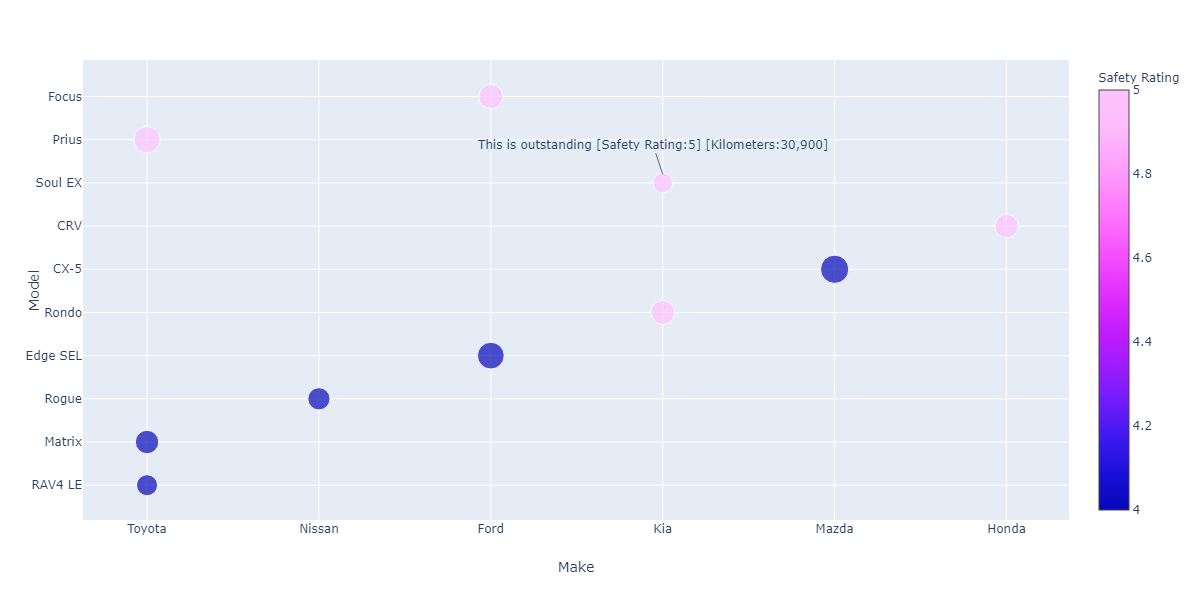

In [716]:
fig = px.scatter(car_data,x="Make",y="Model",color="Safety Rating", size="Kms")

fig.update(layout=dict(legend=dict(orientation='h', y =1.1, x=0.5), annotations=[go.layout.Annotation(text="This is outstanding [Safety Rating:5] [Kilometers:30,900]", x=3,y=7.2)]))

<br>

### Market Price: 

It is noteworthy to comprehend that out of ten cars **five** of them were purchased in 2013. We have one car purchased in 2015 Soul EX price `15,995.00` and safety rating 5, and ones purchased in 2012 Prius also has safety rating 5. However, the least price we have here is `11,999.00` purchased in 2014, Focus from Ford safety rating 5 but drove a mass numbers of roadway 47,197 KM. Here, we have two other cars Rondo and CX-5 also purchased in 2014. The cheapest car we have from Kia has a high-grade safety rating. 

<br>

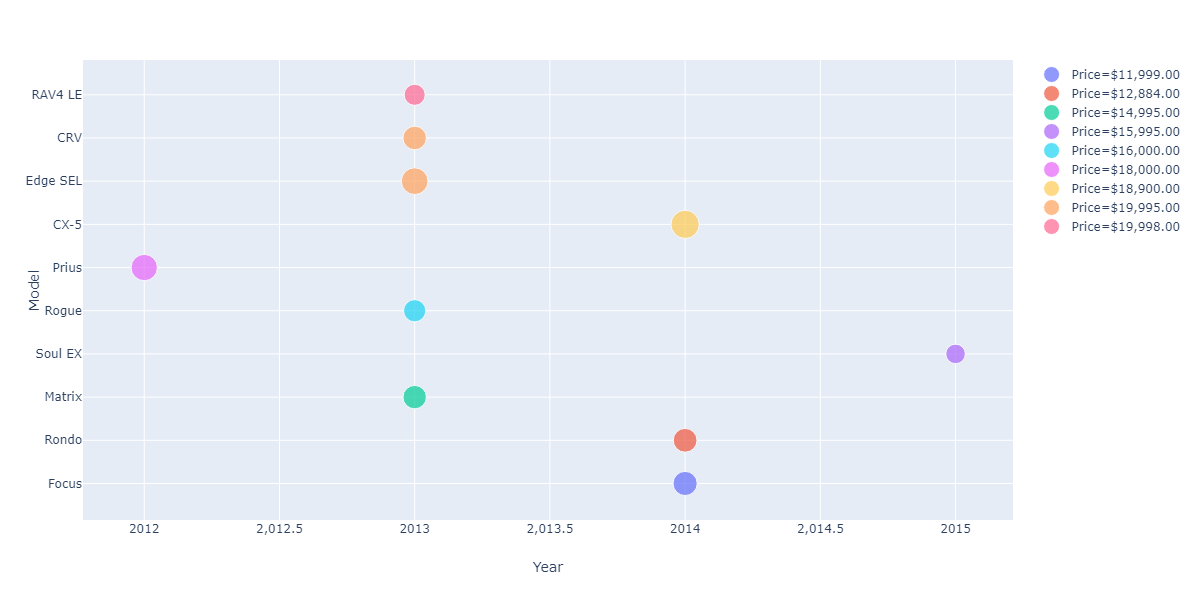

In [719]:
px.scatter(car_data,x="Year",y="Model",color="Price", size="Kms")

<br>

_Why don't we look closer in the car manufacturer, model and their price from the scatter plot following._ 

Our take out from this section,
1. The car hits Safety rating 5 and has the least price. 
2. Kilometers also our main constraints for the next sections to find the best-matched car for Sue. Notably, I have chosen Rondo, CRV, Soul EX, Focus, Prius and RAV4 LE- (even though it has safety rating 4 but noticeably drove for less KM i.e., 35944). 


<br>

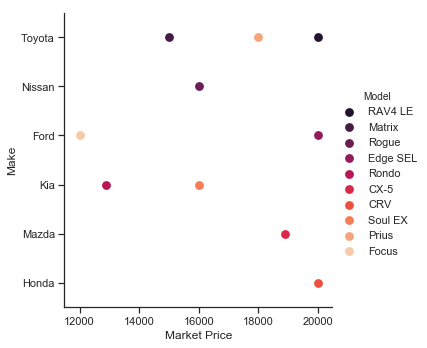

In [772]:
car_data['Market Price'] = car_data['Price'].str.replace('$','')
car_data['Market Price'] = car_data['Market Price'].str.replace(',','')
car_data['Market Price'] = pd.to_numeric(car_data['Market Price'])

sns.catplot('Market Price','Make',hue='Model',data=car_data,kind="point",palette='rocket')
plt.savefig('make.png')

### Rear Legroom:

* Following Sue has a family member of three and has a Dog she requires more Rear Legroom. In my data correlation pattern, we observed how wheelbase depends on the car's length, does it has a correlation with rear legroom for a vehicle. No! preferably we should connect with height and cargo space. Well, it appears to be just Edge SEL has a relation with wheelbase and rear legroom.


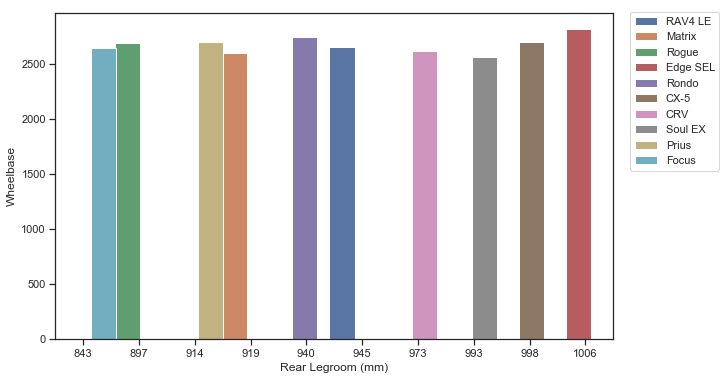

In [734]:
sns.set(style="ticks")

fig, ax = plt.subplots(figsize=(10, 6))
car = sns.barplot(x="Rear Legroom (mm)",y="Wheelbase",hue= "Model",ax=ax, data = car_data)

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        patch.set_width(new_value)

        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .45)
car.legend(loc='right', bbox_to_anchor=(1.20, .76), ncol=1)
plt.savefig('rear.png')
plt.show()

_From the catplot below we may come to a resolution._

* Comparatively, we have noticed in the correlation table Height does involve to determine the rear legroom size. RAV4 LE, Edge SEL, CRV, CX-5 which has maximum Rear Legroom in millimeters. 
* Since cargo volume is also an essential issue for Sue let's dig deeper into this, catplot below manifest how cargo volume is a dependent of car's Height and Rear Legroom. So we have cargo space 966 for CX-5 with best rear legroom and height but safety rating 4, `971 for Prius but we are not biased as it has less legroom is an unusual design!` , the largest CRV:1053 with safety rating 5 and RAV4 LE:1087 but safety rating 4. Honda CRV goes to the next part of my analysis as a champ. 

### Hang on I haven't done yet there is a lot to see!

<br>

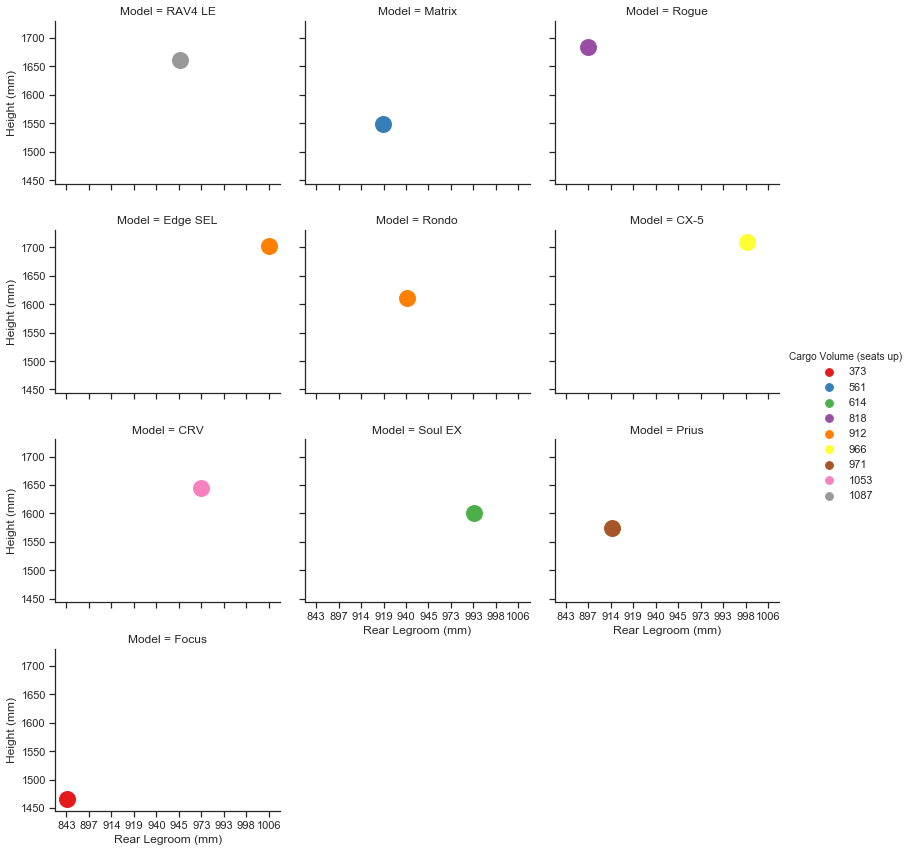

In [723]:
sns.set(style="ticks")
sns.catplot(x="Rear Legroom (mm)", y="Height (mm)",data=car_data, hue="Cargo Volume (seats up)",col="Model", s=17,
            col_wrap=3,height=3,aspect=1.24,palette='Set1')
plt.savefig('col_model.png')
plt.show()

### Fuel Efficiency:

_**Let's see how certain vehicles perform in the road (Highway and city fuel efficiency).**_

* From our chosen list Soul Ex and Edge SEL looks to like a least fuel-efficient car in both Highway and City drive. In terms of best fuel efficiency, Prius could be the number one choice. The car `Focus` could also be an intelligent choice it has less fuel consumption in `city:7.5` and `highway:5.1` and smallest market price amongst all with best SF 5.

* `CRV- HWY:6.4 City:9.0` and `RAV4 LE- HWY:6.4 City:8.7` is almost close enough considering the fuel efficiency. But RAV4 LE has an SF 4 whereas, CRV is SF 5.

* `CX-5 seems more fuel efficient then CRV and RAV4 LE`

_Note: HWY= Highway and SF= Safety Rating_

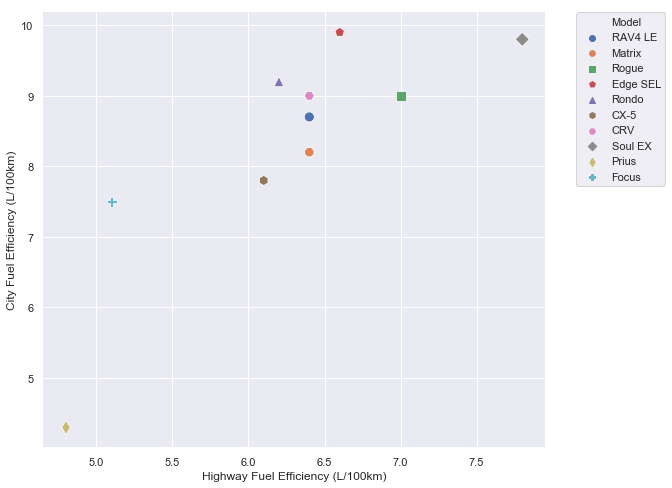

In [757]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(9, 8))
sns.despine(fig, left=True, bottom=True)
filled_markers = ('o', '8', 's', 'p', '^', 'h', 'H', 'D', 'd', 'P') 

car_sf_km = sns.scatterplot(x="Highway Fuel Efficiency (L/100km)", y="City Fuel Efficiency (L/100km)",hue="Model",
                          style="Model", markers=filled_markers, s=100, data=car_data, ax=ax)
car_sf_km.legend(loc='right', bbox_to_anchor=(1.25, 0.8), ncol=1)
plt.savefig('fuel_effi.png')
plt.show()

* It's important to know, the car will be Sue family's primary mode of transportation. So she may go to family trip often, so we may consider the vehicle's Highway fuel efficiency and Engine size. 
* I have visualized this significant data into a Bar plot to see it's performance in the highway and how it's related to the engine size.
* **So far we have two cars in our list for Sue. I am going to measure the values for other cars as well.**

1. Cx-5 is a 2.0L engine and it's HWY fuel efficiency just 6.1 L/100km
2. CRV 2.4L engine HWY fuel efficiency 6.4 L/100km, while RAV4 LE also has same fuel efficiency but engine size 2.5L.
3. Prius 1.8L engine immeasurable fuel efficient car in the highway but still not suitable for Sue's family members since it has less rear legroom and not enough cargo space.

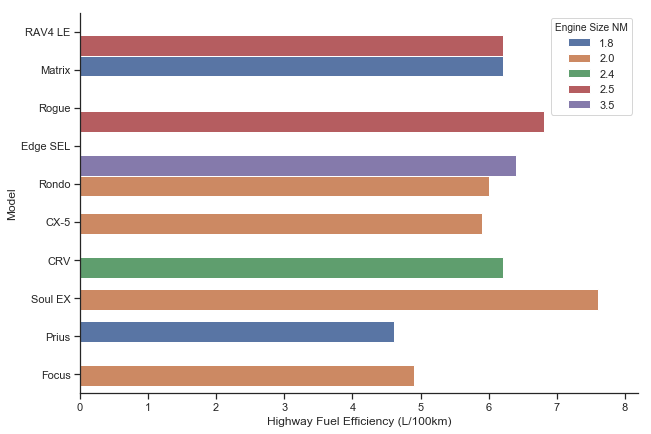

In [775]:
car_data['Engine Size NM'] = car_data['Engine Size'].str.replace('L','')
car_data['Engine Size NM'] = pd.to_numeric(car_data['Engine Size NM'])

fig, ax = plt.subplots(figsize=(10, 7))
sns.despine(fig, left=False, bottom=False)
car_engsize = sns.barplot(x="Highway Fuel Efficiency (L/100km)",y="Model",hue= "Engine Size NM",ax=ax, data = car_data)
def change_height(ax, new_value) :
    for patch in ax.patches :
        current_height = patch.get_height()
        diff = current_height - new_value
        patch.set_height(new_value)
        patch.set_x(patch.get_x() + diff * .5)
change_height(ax, .55)
plt.savefig('engine_size.png')
plt.show()

##### I will make a new field to see how many years it has been moved from today's date considering the car bought.

In [776]:
end = datetime.now()
car_data['Year Drove'] = ((end.year)-car_data['Year'])
car_data.head()

,Make,Model,Year,Safety Rating,Price,Kms,Highway Fuel Efficiency (L/100km),City Fuel Efficiency (L/100km),Tire Size,Length (mm),...,Engine Size NM,Year Drove,Drove/Annual,Tire diameter,HWY Fuel Eff,City Fuel Eff,Cargo,Market Price,HWY FE,City FE
0,Toyota,RAV4 LE,2013,4,"$19,998.00",35944,6.4,8.7,P225/65R17,4569,...,2.5,6,5990.67,17,6.4,8.7,1087,19998.0,6.4,8.7
1,Toyota,Matrix,2013,4,"$14,995.00",44160,6.4,8.2,205/55HR16,4366,...,1.8,6,7360.00,16,6.4,8.2,561,14995.0,6.4,8.2
2,Nissan,Rogue,2013,4,"$16,000.00",40000,7.0,9.0,P215/70R16,4655,...,2.5,6,6666.67,16,7.0,9.0,818,16000.0,7.0,9.0
3,Ford,Edge SEL,2013,4,"$19,995.00",57891,6.6,9.9,245/60HR18,4678,...,3.5,6,9648.50,18,6.6,9.9,912,19995.0,6.6,9.9
4,Kia,Rondo,2014,5,"$12,884.00",45536,6.2,9.2,P205/55HR16,4525,...,2.0,5,9107.20,16,6.2,9.2,912,12884.0,6.2,9.2


* #####  'Drove/Annual' field has created to confirm the calculated values in kilometers i.e., how many Km the car had been driven periodically.

In [769]:
car_data['Drove/Annual'] = car_data['Kms']/car_data['Year Drove']
car_data['Drove/Annual'] = car_data['Drove/Annual'].round(2)
car_data.head()

,Make,Model,Year,Safety Rating,Price,Kms,Highway Fuel Efficiency (L/100km),City Fuel Efficiency (L/100km),Tire Size,Length (mm),...,Engine Size NM,Year Drove,Drove/Annual,Tire diameter,HWY Fuel Eff,City Fuel Eff,Cargo,Market Price,HWY FE,City FE
0,Toyota,RAV4 LE,2013,4,"$19,998.00",35944,6.4,8.7,P225/65R17,4569,...,2.5,6,5990.67,17,6.4,8.7,1087,19998.0,6.4,8.7
1,Toyota,Matrix,2013,4,"$14,995.00",44160,6.4,8.2,205/55HR16,4366,...,1.8,6,7360.00,16,6.4,8.2,561,14995.0,6.4,8.2
2,Nissan,Rogue,2013,4,"$16,000.00",40000,7.0,9.0,P215/70R16,4655,...,2.5,6,6666.67,16,7.0,9.0,818,16000.0,7.0,9.0
3,Ford,Edge SEL,2013,4,"$19,995.00",57891,6.6,9.9,245/60HR18,4678,...,3.5,6,9648.50,18,6.6,9.9,912,19995.0,6.6,9.9
4,Kia,Rondo,2014,5,"$12,884.00",45536,6.2,9.2,P205/55HR16,4525,...,2.0,5,9107.20,16,6.2,9.2,912,12884.0,6.2,9.2


### Annually driven:

* In our following visualization we have four several cars based on their tire diameter and annually driven. There are four cars possessing (P225/65R17) Passengers 17' wheel and RAV4 LE in average driven least for 6 years, on the other hand, `CRV` (225/65R17) drove in average little more then RAVE LE but still. 
* Edge SEL is notable in terms of wheel size 18', I am counting better wheel size as it means better handling but unquestionably, EDGE SEL won't be suggested as it drove roughly 10,000 km yearly which is much higher in km then CRV and RAV4 LE.
* Last but not the least, CX-5 drove for 5 years and having 17' wheel but annually driven most nearly 13000 km.

In [745]:
car_data['Tire diameter'] = car_data["Tire Size"].str[-2:]

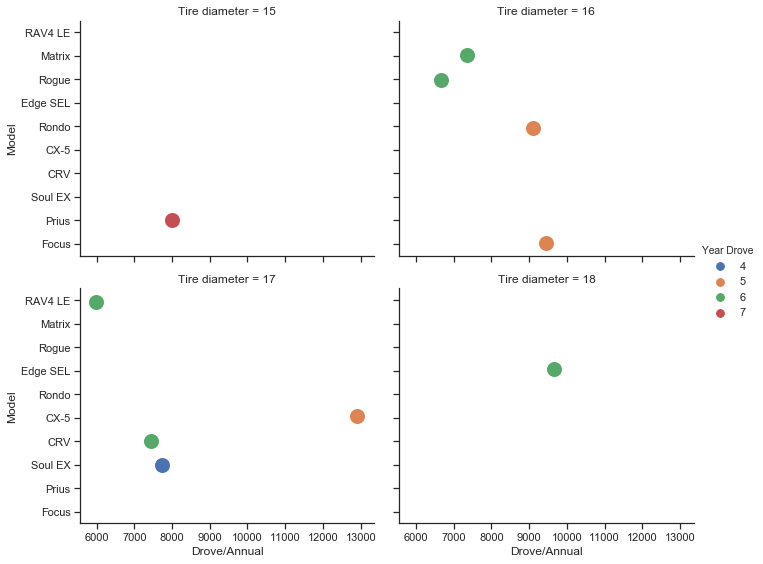

In [762]:
sns.set(style="ticks")
sns.catplot(x="Drove/Annual", y="Model",  
            col="Tire diameter", hue="Year Drove", data=car_data, s=15,
            col_wrap=2,height=4
            ,aspect=1.24)  
plt.savefig('year_drove.png')

### Horsepower:

* Meanwhile, Edge SEL seems not having a Horsepower value, I have figured this value is critical in terms of performance, it also associated to the vehicle's width. For precise judgment, a vehicle bigger requires more horsepower.
* Accordingly, CRV is the best in this case almost 190 horsepower with engine size 2.4L.

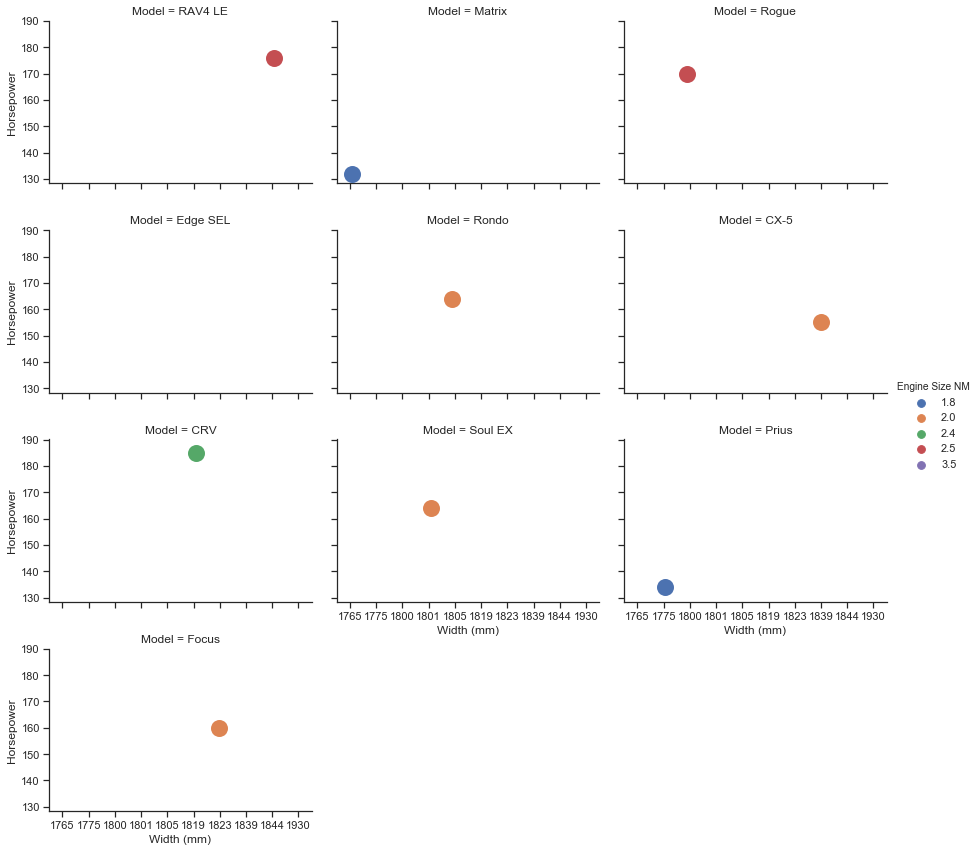

In [767]:
sns.set(style="ticks")
sns.catplot(x="Width (mm)", y="Horsepower", 
            hue="Engine Size NM", col="Model", 
            data=car_data, s=17,
            col_wrap=3,height=3,aspect=1.40)  
plt.savefig('horse.png')

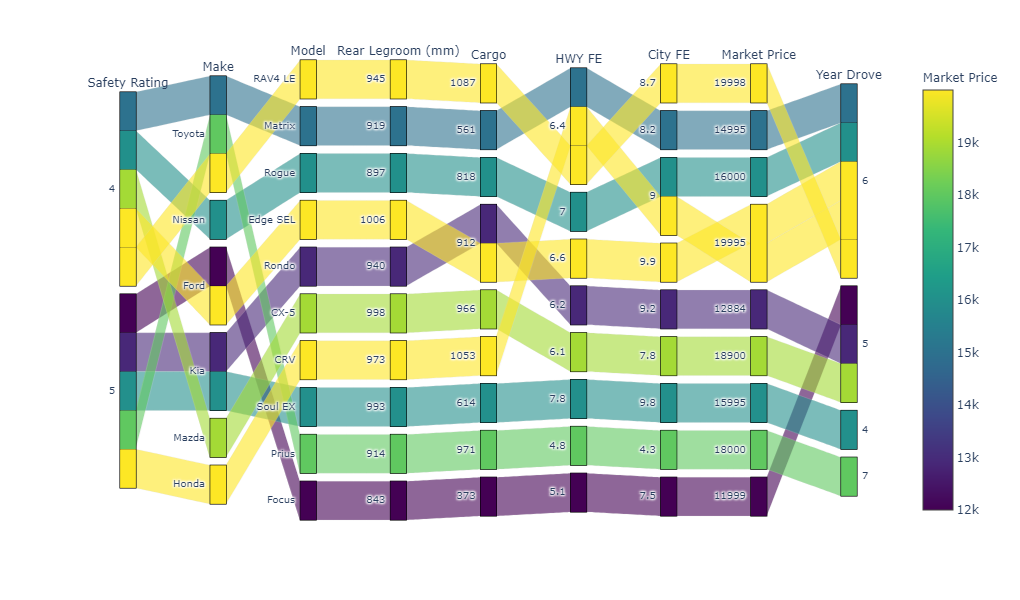

In [771]:
car_data['HWY FE'] = car_data['Highway Fuel Efficiency (L/100km)']
car_data['City FE'] = car_data['City Fuel Efficiency (L/100km)']
car_data['Cargo'] = car_data['Cargo Volume (seats up)']

car_cus = car_data[[ 'Safety Rating', 'Make', 'Model', 'Rear Legroom (mm)', 'Cargo', 'HWY FE', 'City FE', 'Market Price', 'Year Drove']]

px.parallel_categories(car_cus, color="Market Price", color_continuous_scale=px.colors.sequential.Viridis)

### Ultimate Recommendation:

##### I recall after interpreting Safety Rating, Make, Model, Rear Legroom (mm), Cargo, HWY FE, City FE, Market Price, Year Drove these constraints we all can acknowledge that CRV is the ultimate champions in the race. We can also admit CX-5 manufactured in the 2014 year if it meets all safety requirements that Sue's demand.

In [736]:
car_2data = (car_data.loc[car_data['Model'].isin(['CRV','CX-5'])])
car_2data.head()

,Make,Model,Year,Safety Rating,Price,Kms,Highway Fuel Efficiency (L/100km),City Fuel Efficiency (L/100km),Tire Size,Length (mm),...,Engine Size NM,Year Drove,Drove/Annual,Tire diameter,HWY Fuel Eff,City Fuel Eff,Cargo,Market Price,HWY FE,City FE
5,Mazda,CX-5,2014,4,"$18,900.00",64546,6.1,7.8,P225/65R17,4554,...,2.0,5,12909.20,17,6.1,7.8,966,18900.0,6.1,7.8
6,Honda,CRV,2013,5,"$19,995.00",44665,6.4,9.0,225/65R17,4529,...,2.4,6,7444.17,17,6.4,9.0,1053,19995.0,6.4,9.0


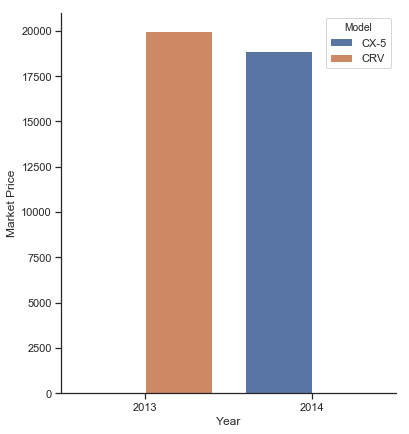

In [754]:
sns.set(style="ticks")
fig, ax = plt.subplots(figsize=(6, 7))
sns.despine(fig, left=False, bottom=False)
sns.barplot(x="Year", y="Market Price",hue="Model", data=car_2data, ax=ax)
plt.savefig('final.png')

My Recommendation would be what you think!

1. CRV while considering all aspect.
2. CX-5